In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install squarify
#plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import pygsheets
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [2]:
#connect to google sheets
gc = pygsheets.authorize()

In [3]:
#choose which sheet to open
sh = gc.open('Diversity Equity & Inclusion Survey (Responses)')

In [4]:
#get 'Diversity Equity & Inclusion Survey (Responses)' id
sh.id

'1GCaCKhpp_JjQl2rkwx2Pr46jvzIlHnQidWxDQosUZak'

In [5]:
#check title
sh.title

'Diversity Equity & Inclusion Survey (Responses)'

In [6]:
#check url
sh.url

'https://docs.google.com/spreadsheets/d/1GCaCKhpp_JjQl2rkwx2Pr46jvzIlHnQidWxDQosUZak'

In [7]:
#when was the sheet last updates
sh.updated

'2020-09-29T22:00:33.523Z'

In [8]:
#get the sheet we want to look at. In our case only one sheet called it wk1 of responses
wk1 = sh.sheet1

In [9]:
#check title, id and url
wk1.title
wk1.id
wk1.url

'https://docs.google.com/spreadsheets/d/1GCaCKhpp_JjQl2rkwx2Pr46jvzIlHnQidWxDQosUZak/edit#gid=1691373338'

In [42]:
#how many rows in sheet
wk1.rows

306

In [43]:
#how many columns
wk1.cols

27

In [44]:
#create a dataframe
dei=pd.DataFrame(wk1.get_all_records())

In [45]:
#take a look at the data 
dei

,Timestamp,What is your age?,What is your gender?,What is your race?,What is your sexual orientation?,What is your gender identity?,How long have you worked for FC?,What is your employment status?,Which DEI efforts would you like to see prioritized at Foundation Communities? (Select your top 3),Other (please let us know what other efforts you'd like to see prioritized),...,"At work, I feel comfortable being myself.",Diversity and Inclusiveness issues are openly discussed.,Employees in my organization are treated with respect and dignity.,"Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.",I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.,"If I raised a concern about ethics and integrity, I am confident my employer would do what is right.",My organization treasures diverse opinions and ideas.,My team members appreciate my contributions.,My supervisor tries to understand my point of view.,My workplace is committed to building the strengths of each employee.
0,9/15/2020 10:46:43,45-54,Female,White,,Woman,5-10 years,Full-time,,,...,3,3,3,3,3,3,3,3,3,3
1,9/15/2020 10:46:49,25-34,Male,White,LGBTQ+,Man,1-3 years,Full-time,"Provide training for staff, leadership, and bo...",,...,4,3,4,3,2,4,4,4,5,3
2,9/15/2020 10:47:35,45-54,Male,White,Straight,Man,10+ years,Full-time,Work with external community on race equity/in...,"grow our work on housing, income, wealth, heal...",...,5,5,5,5,5,5,5,5,5,5
3,9/15/2020 10:47:46,25-34,Female,White,LGBTQ+,Woman,3-5 years,Full-time,Address ways that racial inequity/systemic bia...,,...,5,5,4,4,4,4,3,5,5,4
4,9/15/2020 10:47:51,25-34,Female,White,Straight,Woman,1-3 years,Full-time,Address ways that racial inequity/systemic bia...,a mechanism for holding staff accountable is i...,...,4,3,3,3,4,2,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,9/29/2020 14:07:53,35-44,Female,Black/ African American,Straight,Woman,3-5 years,Full-time,Address ways that racial inequity/systemic bia...,More people of color in higher supervisory pos...,...,3,2,4,3,2,3,4,4,4,4
201,9/29/2020 14:17:59,25-34,Female,Black/ African American,Straight,Woman,Less than a year,Full-time,"Provide training for staff, leadership, and bo...",,...,3,3,3,3,1,2,2,5,5,4
202,9/29/2020 14:28:40,45-54,Male,White,Straight,Man,1-3 years,Full-time,"Provide training for staff, leadership, and bo...",,...,5,5,5,5,5,5,5,5,5,5
203,9/29/2020 15:03:08,55-64,Female,Black/ African American,Straight,Woman,1-3 years,Full-time,Address ways that racial inequity/systemic bia...,,...,1,1,1,1,1,1,1,1,1,1


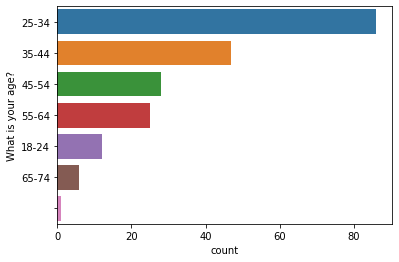

In [14]:
#figures by column 
age_fig=sns.countplot(y=dei['What is your age?'],
                      order=dei['What is your age?'].value_counts().index)
age_fig

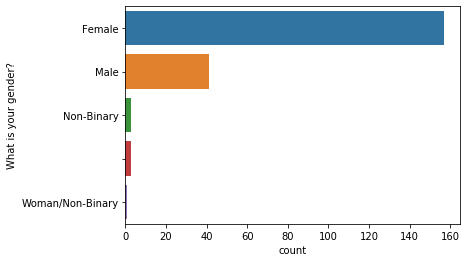

In [15]:

gender_fig = sns.countplot(y=dei['What is your gender?'],
                           order=dei['What is your gender?'].value_counts().index)
gender_fig

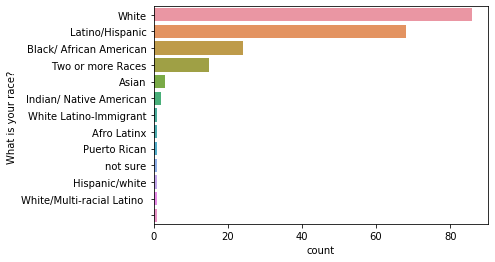

In [16]:
race_fig_1=sns.countplot(y=dei['What is your race? '],
                       order=dei['What is your race? '].value_counts().index)
race_fig_1

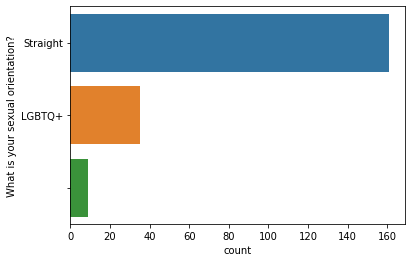

In [17]:
so_fig=sns.countplot(y=dei['What is your sexual orientation?'],
                     order=dei['What is your sexual orientation?'].value_counts().index)
so_fig

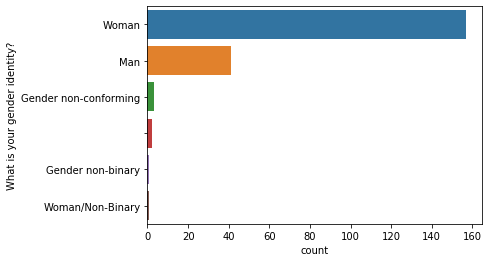

In [18]:
gi_fig=sns.countplot(y=dei['What is your gender identity?'],
                     order=dei['What is your gender identity?'].value_counts().index)
gi_fig

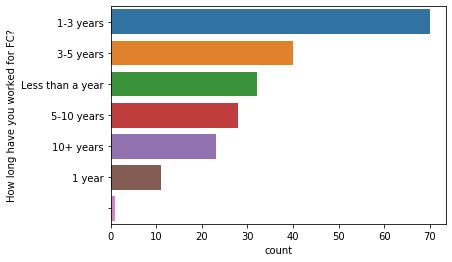

In [19]:
work_years_fig=sns.countplot(y=dei['How long have you worked for FC?'],
                             order=dei['How long have you worked for FC?'].value_counts().index)
work_years_fig

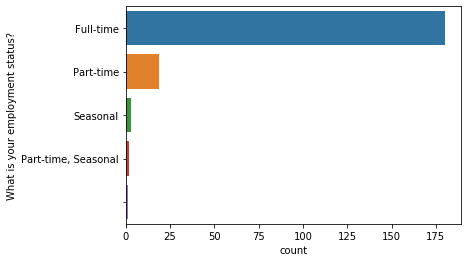

In [20]:
es_fig=sns.countplot(y=dei['What is your employment status?'],
                     order=dei['What is your employment status?'].value_counts().index)
es_fig

In [21]:
'Which DEI efforts would you like to see prioritized at Foundation Communities? (Select your top 3)'

'Which DEI efforts would you like to see prioritized at Foundation Communities? (Select your top 3)'

In [22]:
#dei_efforts_fig = sns.countplot(y=dei['Which DEI efforts would you like to see prioritized at Foundation Communities? (Select your top 3)'],
                     #order=dei['Which DEI efforts would you like to see prioritized at Foundation Communities? (Select your top 3)'].value_counts().index)
#dei_efforts_fig

In [23]:
#when was the sheet last updates
sh.updated

'2020-09-29T22:00:33.523Z'

In [24]:
#!pip install wordcloud

In [49]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
    plt.savefig("word_cloud3.png",bbox_inches='tight')



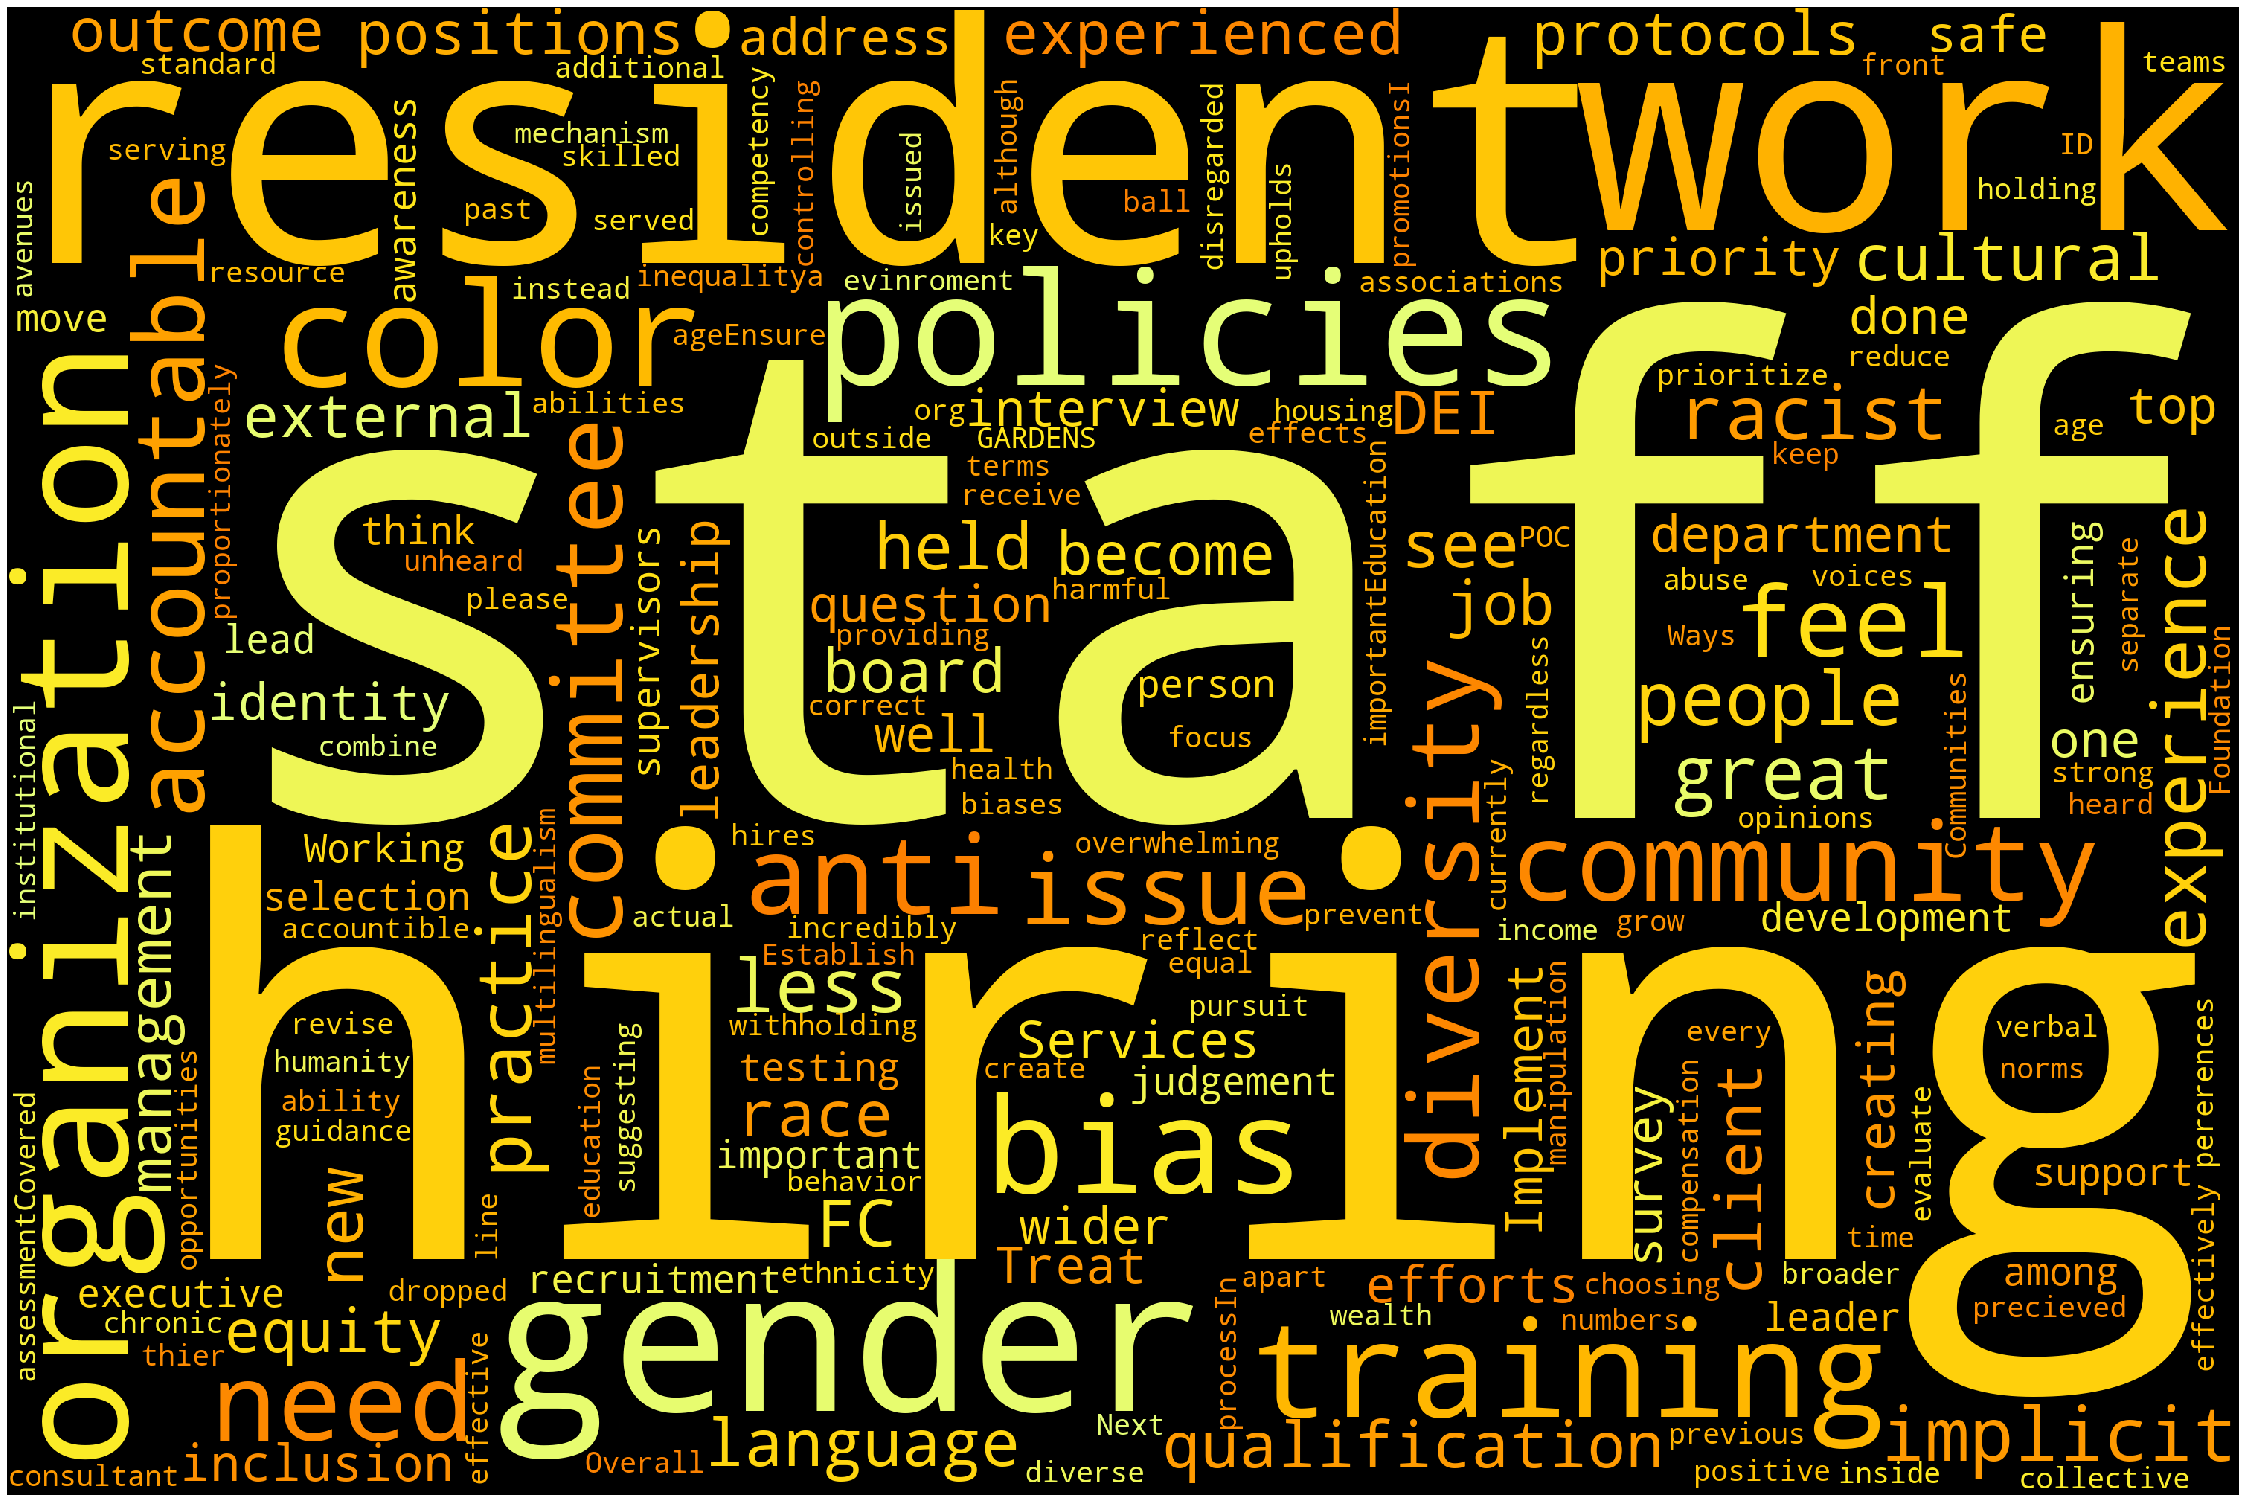

In [50]:
#generate word cloud for open ended question
wordcloud_hc = WordCloud(width=3000, height=2000, random_state=1, background_color='black', colormap='Wistia', collocations=False, stopwords=STOPWORDS).generate(dei["Other (please let us know what other efforts you'd like to see prioritized)"].str.cat())

plot_cloud(wordcloud_hc)

In [27]:
sh.updated

'2020-09-29T22:00:33.523Z'

In [28]:
names=["Female", "Male", "Blank", "Non-Binary", "Woman/Non-Binary"]
for template in ["plotly_dark"]:
    fig = px.pie(dei, values=dei["What is your gender?"].value_counts(), names=names)
    fig.update_traces(textposition='inside')
    fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
    fig.show()



In [29]:
dei["What is your race? "].value_counts()

White                         86
Latino/Hispanic               68
Black/ African American       24
Two or more Races             15
Asian                          3
Indian/ Native American        2
White Latino-Immigrant         1
Afro Latinx                    1
Puerto Rican                   1
not sure                       1
Hispanic/white                 1
White/Multi-racial Latino      1
                               1
Name: What is your race? , dtype: int64

In [30]:
names = ["White", "Latino/Hispanic", "Black/ African American", "Two or more Races", "Asian", "Indian/ Native American", "White Latino-Immigrant", "Puerto Rican", "not sure", "Afro Latinx", "Hispanic/white", "       ", "White/Multi-racial Latino"]
for template in ["plotly_dark"]:
    fig = px.pie(dei, values=dei["What is your race? "].value_counts(), names=names)
    fig.update_traces(textposition='inside')
    fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
    fig.show()

In [31]:
import plotly.express as px
fig = px.histogram(dei, x="What is your age?", color="What is your gender?")
fig.show()

In [41]:
fig = px.histogram(dei, x="What is your age?", color="What is your gender?", #marginal="box", # can be `box`, `violin`
                         hover_data=dei.columns)
fig.show()

In [33]:
for bar in ["plotly_dark"]:
    fig = px.bar(dei, x="What is your age?", color="What is your race? ")
    fig.show()

In [34]:
fig = px.bar(dei, x="How long have you worked for FC?", color="What is your race? ")
fig.show()

In [35]:
dei["Which DEI efforts would you like to see prioritized at Foundation Communities? (Select your top 3)"].value_counts()


Provide training for staff, leadership, and board, Address ways that racial inequity/systemic bias impact issues the organization works on and hold senior team members accountable for anti-racists actions, Develop recruitment and hiring protocols and strategies that include implicit bias testing for managers and supervisors                   13
Address ways that racial inequity/systemic bias impact issues the organization works on and hold senior team members accountable for anti-racists actions, Increase diverse representation on board and advisory committees, Develop recruitment and hiring protocols and strategies that include implicit bias testing for managers and supervisors    13
Provide training for staff, leadership, and board, Address ways that racial inequity/systemic bias impact issues the organization works on and hold senior team members accountable for anti-racists actions, Work with external community on race equity/inclusion                                               

In [36]:

fig = px.bar(dei, x="Which DEI efforts would you like to see prioritized at Foundation Communities? (Select your top 3)")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [37]:

fig = px.histogram(dei, x="At work, I am treated with respect.  ", color="What is your race? ")
fig.show()

In [38]:
fig = px.histogram(dei, x="At work, I feel comfortable being myself.  ", color="What is your race? ")
fig.show()

In [39]:
fig = px.histogram(dei, x="At work, I feel comfortable being myself.  ", color="What is your gender?")
fig.show()

In [40]:
fig = px.histogram(dei, x="At work, I feel comfortable being myself.  ", color="What is your sexual orientation?")
fig.show()